In [1]:
import os
import requests
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import FloatProgress
from IPython.display import display
import time
import os.path
from os import path
import pickle

import sys
sys.path.insert(0, '../completenessContours')
import compute_num_completeness_w_ve_insol as kp

sys.path.insert(0, '..')
import occRateUtils as ut
import occRateModels as rm
import rateModels3D as rm3D

In [2]:
stellarTypes = ["hab", "hab2", "GK", "FGK"]
extrapTypes = ["extrap_const", "extrap_zero"]
hzTypes = ["optimistic", "conservative"]
catalog = "dr25"

figDir = "summaryFigures"

In [3]:
fileName = "hzOcc.pkl"
if path.exists(fileName): 
    f = open(fileName, "rb")    
    hzOcc = pickle.load(f)
    f.close()
else:
    hzOcc = {}
    for stellarType in stellarTypes:
        if stellarType == "hab":
            teffRange = (4800, 6300)
        elif stellarType == "hab2":
            teffRange = (3900, 6300)
        elif stellarType == "GK":
            teffRange = (3900, 6000)
        elif stellarType == "FGK":
            teffRange = (3900, 7300)
        else:
            raise ValueError('Bad catalog name');

        cs = rm3D.compSpace(periodName = "Insolation", 
                       periodUnits = "Earth Flux",
                       periodRange = (0.2, 2.2), 
                       nPeriod = 61, 
                       radiusName = "Radius", 
                       radiusUnits = "$R_\oplus$",
                       rpRange = (0.5, 2.5), 
                       nRp = 61,
                       tempName = "$T_\mathrm{eff}$", 
                       tempUnits = "$R_\oplus$",
                       tempRange = teffRange, 
                       nTemp = 10)

        model = rm3D.dualPowerLawFixedTeffAvg(cs)
        hzOcc[stellarType] = {}
        for extrapType in extrapTypes:
            outDir = "computeOccurrencefixedTeff_" + catalog + "_" + stellarType + "_"  \
                + model.name + "_" + "optimistic" + "_" + extrapType + "_out"
            print(outDir)
            if not path.exists(outDir): 
                print("does not exist")
                continue

            hzOcc[stellarType][extrapType] = {}
            for hzType in hzTypes:
                hzOcc[stellarType][extrapType][hzType] = {}

                post = np.load(outDir + "/occurenceRatePosteriors.npy")           
                hzOcc[stellarType][extrapType][hzType]["reliability"] = {}
                hzOcc[stellarType][extrapType][hzType]["reliability"]["fitData"] \
                    = ut.medianAndErrorbars(post)
                hzOcc[stellarType][extrapType][hzType]["reliability"]["dist"], \
                    hzOcc[stellarType][extrapType][hzType]["reliability"]["teff"] \
                    = rm3D.hzOccRate2D([4800,6300], [0.5,1.5], post, model, 
                                     cs, nSamples = 10000, hzType = hzType)
                hzOcc[stellarType][extrapType][hzType]["reliability"]["str"] \
                    = ut.printMedianAndErrorbars(hzOcc[stellarType][extrapType][hzType]["reliability"]["dist"].flatten(), precision=2)

                post = np.load(outDir + "/occurenceRatePosteriors_noreliability.npy")           
                hzOcc[stellarType][extrapType][hzType]["noReliability"] = {}
                hzOcc[stellarType][extrapType][hzType]["noReliability"]["fitData"] \
                    = ut.medianAndErrorbars(post)
                hzOcc[stellarType][extrapType][hzType]["noReliability"]["dist"] \
                    = rm3D.hzOccRate([4800,6300], [0.5,1.5], post, model, 
                                     cs, nSamples = None, hzType = hzType)
                hzOcc[stellarType][extrapType][hzType]["noReliability"]["str"] \
                    = ut.printMedianAndErrorbars(hzOcc[stellarType][extrapType][hzType]["noReliability"]["dist"], precision=2)

    f = open(fileName,"wb")
    pickle.dump(hzOcc,f)
    f.close()

In [4]:
fileName = "hzOccTeff.pkl"
if path.exists(fileName): 
    f = open(fileName, "rb")    
    hzOccTeff = pickle.load(f)
    f.close()
else:
    hzOccTeff = {}
    for stellarType in stellarTypes:
        if stellarType == "hab":
            teffRange = (4800, 6300)
        elif stellarType == "hab2":
            teffRange = (3900, 6300)
        elif stellarType == "GK":
            teffRange = (3900, 6000)
        elif stellarType == "FGK":
            teffRange = (3900, 7300)
        else:
            raise ValueError('Bad catalog name');

        cs = rm3D.compSpace(periodName = "Insolation", 
                       periodUnits = "Earth Flux",
                       periodRange = (0.2, 2.2), 
                       nPeriod = 61, 
                       radiusName = "Radius", 
                       radiusUnits = "$R_\oplus$",
                       rpRange = (0.5, 2.5), 
                       nRp = 61,
                       tempName = "$T_\mathrm{eff}$", 
                       tempUnits = "$R_\oplus$",
                       tempRange = teffRange, 
                       nTemp = 10)

        model = rm3D.triplePowerLawTeffAvg(cs)
        hzOccTeff[stellarType] = {}
        for extrapType in extrapTypes:
            outDir = "computeOccurrencefixedTeff_" + catalog + "_" + stellarType + "_"  \
                + model.name + "_" + "optimistic" + "_" + extrapType + "_out"
            print(outDir)
            if not path.exists(outDir): 
                print("does not exist")
                continue
            hzOccTeff[stellarType][extrapType] = {}
            for hzType in hzTypes:
                hzOccTeff[stellarType][extrapType][hzType] = {}

                post = np.load(outDir + "/occurenceRatePosteriors.npy")           
                hzOccTeff[stellarType][extrapType][hzType]["reliability"] = {}
                hzOccTeff[stellarType][extrapType][hzType]["reliability"]["fitData"] \
                    = ut.medianAndErrorbars(post)
                hzOccTeff[stellarType][extrapType][hzType]["reliability"]["dist"], \
                    hzOccTeff[stellarType][extrapType][hzType]["reliability"]["teff"] \
                    = rm3D.hzOccRate2D([4800,6300], [0.5,1.5], post, model, 
                                     cs, nSamples = 10000, hzType = hzType)
                hzOccTeff[stellarType][extrapType][hzType]["reliability"]["str"] \
                    = ut.printMedianAndErrorbars(hzOccTeff[stellarType][extrapType][hzType]["reliability"]["dist"].flatten(), precision=2)

                post = np.load(outDir + "/occurenceRatePosteriors_noreliability.npy")           
                hzOccTeff[stellarType][extrapType][hzType]["noReliability"] = {}
                hzOccTeff[stellarType][extrapType][hzType]["noReliability"]["fitData"] \
                    = ut.medianAndErrorbars(post)
                hzOccTeff[stellarType][extrapType][hzType]["noReliability"]["dist"] \
                    = rm3D.hzOccRate([4800,6300], [0.5,1.5], post, model, 
                                     cs, nSamples = None, hzType = hzType)
                hzOccTeff[stellarType][extrapType][hzType]["noReliability"]["str"] \
                    = ut.printMedianAndErrorbars(hzOccTeff[stellarType][extrapType][hzType]["noReliability"]["dist"], precision=2)

    f = open(fileName,"wb")
    pickle.dump(hzOccTeff,f)
    f.close()

In [5]:
fileName = "hzOccDual.pkl"
if path.exists(fileName): 
    f = open(fileName, "rb")    
    hzOccDual = pickle.load(f)
    f.close()
else:
    hzOccDual = {}
    for stellarType in stellarTypes:
        if stellarType == "hab":
            teffRange = (4800, 6300)
        elif stellarType == "hab2":
            teffRange = (3900, 6300)
        elif stellarType == "GK":
            teffRange = (3900, 6000)
        elif stellarType == "FGK":
            teffRange = (3900, 7300)
        else:
            raise ValueError('Bad catalog name');

        cs = rm3D.compSpace(periodName = "Insolation", 
                       periodUnits = "Earth Flux",
                       periodRange = (0.2, 2.2), 
                       nPeriod = 61, 
                       radiusName = "Radius", 
                       radiusUnits = "$R_\oplus$",
                       rpRange = (0.5, 2.5), 
                       nRp = 61,
                       tempName = "$T_\mathrm{eff}$", 
                       tempUnits = "$R_\oplus$",
                       tempRange = teffRange, 
                       nTemp = 10)

        model = rm3D.dualPowerLaw(cs)
        hzOccDual[stellarType] = {}
        for extrapType in extrapTypes:
            outDir = "computeOccurrencefixedTeff_" + catalog + "_" + stellarType + "_"  \
                + model.name + "_" + "optimistic" + "_" + extrapType + "_out"
            print(outDir)
            if not path.exists(outDir): 
                print("does not exist")
                continue

            hzOccDual[stellarType][extrapType] = {}
            for hzType in hzTypes:
                hzOccDual[stellarType][extrapType][hzType] = {}

                post = np.load(outDir + "/occurenceRatePosteriors.npy")           
                hzOccDual[stellarType][extrapType][hzType]["reliability"] = {}
                hzOccDual[stellarType][extrapType][hzType]["reliability"]["fitData"] \
                    = ut.medianAndErrorbars(post)
                hzOccDual[stellarType][extrapType][hzType]["reliability"]["dist"], \
                    hzOccDual[stellarType][extrapType][hzType]["reliability"]["teff"] \
                    = rm3D.hzOccRate2D([4800,6300], [0.5,1.5], post, model, 
                                     cs, nSamples = 10000, hzType = hzType)
                hzOccDual[stellarType][extrapType][hzType]["reliability"]["str"] \
                    = ut.printMedianAndErrorbars(hzOccDual[stellarType][extrapType][hzType]["reliability"]["dist"].flatten(), precision=2)

                post = np.load(outDir + "/occurenceRatePosteriors_noreliability.npy")           
                hzOccDual[stellarType][extrapType][hzType]["noReliability"] = {}
                hzOccDual[stellarType][extrapType][hzType]["noReliability"]["fitData"] \
                    = ut.medianAndErrorbars(post)
                hzOccDual[stellarType][extrapType][hzType]["noReliability"]["dist"] \
                    = rm3D.hzOccRate([4800,6300], [0.5,1.5], post, model, 
                                     cs, nSamples = None, hzType = hzType)
                hzOccDual[stellarType][extrapType][hzType]["noReliability"]["str"] \
                    = ut.printMedianAndErrorbars(hzOccDual[stellarType][extrapType][hzType]["noReliability"]["dist"], precision=2)

    f = open(fileName,"wb")
    pickle.dump(hzOccDual,f)
    f.close()

In [6]:
fileName = "hzOccTriple.pkl"
if path.exists(fileName): 
    f = open(fileName, "rb")    
    hzOccTriple = pickle.load(f)
    f.close()
else:
    hzOccTriple = {}
    for stellarType in stellarTypes:
        if stellarType == "hab":
            teffRange = (4800, 6300)
        elif stellarType == "hab2":
            teffRange = (3900, 6300)
        elif stellarType == "GK":
            teffRange = (3900, 6000)
        elif stellarType == "FGK":
            teffRange = (3900, 7300)
        else:
            raise ValueError('Bad catalog name');

        cs = rm3D.compSpace(periodName = "Insolation", 
                       periodUnits = "Earth Flux",
                       periodRange = (0.2, 2.2), 
                       nPeriod = 61, 
                       radiusName = "Radius", 
                       radiusUnits = "$R_\oplus$",
                       rpRange = (0.5, 2.5), 
                       nRp = 61,
                       tempName = "$T_\mathrm{eff}$", 
                       tempUnits = "$R_\oplus$",
                       tempRange = teffRange, 
                       nTemp = 10)

        model = rm3D.triplePowerLaw(cs)
        hzOccTriple[stellarType] = {}
        for extrapType in extrapTypes:
            outDir = "computeOccurrencefixedTeff_" + catalog + "_" + stellarType + "_"  \
                + model.name + "_" + "optimistic" + "_" + extrapType + "_out"
            print(outDir)
            if not path.exists(outDir): 
                print("does not exist")
                continue

            hzOccTriple[stellarType][extrapType] = {}
            for hzType in hzTypes:
                hzOccTriple[stellarType][extrapType][hzType] = {}

                post = np.load(outDir + "/occurenceRatePosteriors.npy")           
                hzOccTriple[stellarType][extrapType][hzType]["reliability"] = {}
                hzOccTriple[stellarType][extrapType][hzType]["reliability"]["fitData"] \
                    = ut.medianAndErrorbars(post)
                hzOccTriple[stellarType][extrapType][hzType]["reliability"]["dist"], \
                    hzOccTriple[stellarType][extrapType][hzType]["reliability"]["teff"] \
                    = rm3D.hzOccRate2D([4800,6300], [0.5,1.5], post, model, 
                                     cs, nSamples = 10000, hzType = hzType)
                hzOccTriple[stellarType][extrapType][hzType]["reliability"]["str"] \
                    = ut.printMedianAndErrorbars(hzOccTriple[stellarType][extrapType][hzType]["reliability"]["dist"].flatten(), precision=2)

                post = np.load(outDir + "/occurenceRatePosteriors_noreliability.npy")           
                hzOccTriple[stellarType][extrapType][hzType]["noReliability"] = {}
                hzOccTriple[stellarType][extrapType][hzType]["noReliability"]["fitData"] \
                    = ut.medianAndErrorbars(post)
                hzOccTriple[stellarType][extrapType][hzType]["noReliability"]["dist"] \
                    = rm3D.hzOccRate([4800,6300], [0.5,1.5], post, model, 
                                     cs, nSamples = None, hzType = hzType)
                hzOccTriple[stellarType][extrapType][hzType]["noReliability"]["str"] \
                    = ut.printMedianAndErrorbars(hzOccTriple[stellarType][extrapType][hzType]["noReliability"]["dist"], precision=2)

    f = open(fileName,"wb")
    pickle.dump(hzOccTriple,f)
    f.close()

In [7]:
def hist_smooth(data, N=100, color='-', alpha=1.0):
    hDat = np.histogram(data, N)
    valX = (hDat[1][0:-1] + hDat[1][1:])/2
    valY = hDat[0]
    valX = np.insert(valX, 0, 0)    
    valY = np.insert(valY, 0, 0)    
    plt.plot(valX, valY, color, alpha=alpha);


In [8]:
capsize = 8
cbc = ['#377eb8', '#ff7f00', '#4daf4a',
                  '#f781bf', '#a65628', '#984ea3',
                  '#999999', '#e41a1c', '#dede00']
# def show_stellar_props(extrapType, hzType, rel):
#     plt.figure(figsize=(7,5));
#     legendStr = []
#     for i, stellarType in enumerate(stellarTypes):
#         dist = hzOcc[stellarType][extrapType][hzType][rel]["dist"]
#         plt.hist(dist[dist<5], 50, ls = "--", color = cbc[i+4], histtype="step", density=True, zorder=1)
#         legendStr.append(stellarType + ", $\lambda_3$")

#     for i, stellarType in enumerate(stellarTypes):
#         dist = hzOccTeff[stellarType][extrapType][hzType][rel]["dist"]
#         if stellarType == "hab2":
#             plt.hist(dist[dist<5], 50, color = 'k', lw = 5.0, histtype="step", density=True, zorder=100)
#         else:
#             plt.hist(dist[dist<5], 50, color = cbc[i], histtype="step", density=True, zorder=1)
#         legendStr.append(stellarType + ", $\lambda_1$")

#     plt.legend(legendStr, fontsize = 16);
#     yl = plt.ylim()
#     yl = plt.ylim()
#     ebHeight = 1.08
#     for i, stellarType in enumerate(stellarTypes):
#         dist = hzOcc[stellarType][extrapType][hzType][rel]["dist"]
#         stats = ut.medianAndErrorbars(dist.flatten())
#         eb = plt.errorbar(stats[0], ebHeight*yl[1], xerr=[[stats[2]],[stats[1]]], ls = "--", capsize = capsize, color = cbc[i+4], fmt='d')
#         eb[-1][0].set_linestyle('--')
#         ebHeight -= 0.02

#     for i, stellarType in enumerate(stellarTypes):
#         dist = hzOccTeff[stellarType][extrapType][hzType][rel]["dist"]
#         stats = ut.medianAndErrorbars(dist.flatten())
#         if stellarType == "hab2":
#             plt.errorbar(stats[0], ebHeight*yl[1], xerr=[[stats[2]],[stats[1]]], lw = 3.0, capsize = capsize, color = 'k', fmt='-d', zorder=100)
#         else:
#             plt.errorbar(stats[0], ebHeight*yl[1], xerr=[[stats[2]],[stats[1]]], capsize = capsize, color = cbc[i], fmt='-d', zorder=1)
#         ebHeight -= 0.02

#     plt.gca().set_yticklabels([])
#     xl = plt.xlim()
#     plt.xlim(xl[0], 5)
#     plt.tick_params(labelsize = 18)

stellarTypes = ["hab", "hab2"]
def show_stellar_props(extrapType, hzType, rel):
    plt.figure(figsize=(7,5));
    legendStr = []

    for i, stellarType in enumerate(stellarTypes):
        dist = hzOccTeff[stellarType][extrapType][hzType][rel]["dist"]
        if stellarType == "hab2":
            plt.hist(dist[dist<5], 50, color = 'k', lw = 5.0, histtype="step", density=True, zorder=100)
        else:
            plt.hist(dist[dist<5], 50, ls = "--", color = 'k', histtype="step", density=True, zorder=1)
        legendStr.append(stellarType + ", Model 1")

    for i, stellarType in enumerate(stellarTypes):
        dist = hzOccTriple[stellarType][extrapType][hzType][rel]["dist"]
        if stellarType == "hab2":
            plt.hist(dist[dist<5], 50, color = cbc[0], histtype="step", density=True, zorder=1)
        else:
            plt.hist(dist[dist<5], 50, ls = "--", color = cbc[0], histtype="step", density=True, zorder=1)
        legendStr.append(stellarType + ", Model 2")

    for i, stellarType in enumerate(stellarTypes):
        dist = hzOcc[stellarType][extrapType][hzType][rel]["dist"]
        if stellarType == "hab2":
            plt.hist(dist[dist<5], 50, color = cbc[1], histtype="step", density=True, zorder=1)
        else:
            plt.hist(dist[dist<5], 50, ls = "--", color = cbc[1], histtype="step", density=True, zorder=1)
        legendStr.append(stellarType + ", Model 3")

    plt.legend(legendStr, fontsize = 16, loc = "right");
    yl = plt.ylim()
    yl = plt.ylim()
    ebHeight = 1.08
    for i, stellarType in enumerate(stellarTypes):
        dist = hzOccTeff[stellarType][extrapType][hzType][rel]["dist"]
        stats = ut.medianAndErrorbars(dist.flatten())
        if stellarType == "hab2":
            plt.errorbar(stats[0], ebHeight*yl[1], xerr=[[stats[2]],[stats[1]]], lw = 3.0, capsize = capsize, color = 'k', fmt='-d', zorder=100)
        else:
            eb = plt.errorbar(stats[0], ebHeight*yl[1], xerr=[[stats[2]],[stats[1]]], capsize = capsize, color = 'k', fmt='-d', zorder=1)
            eb[-1][0].set_linestyle('--')
        ebHeight -= 0.02

    for i, stellarType in enumerate(stellarTypes):
        dist = hzOccTriple[stellarType][extrapType][hzType][rel]["dist"]
        stats = ut.medianAndErrorbars(dist.flatten())
        if stellarType == "hab2":
            eb = plt.errorbar(stats[0], ebHeight*yl[1], xerr=[[stats[2]],[stats[1]]], capsize = capsize, color = cbc[0], fmt='d')
        else:
            eb = plt.errorbar(stats[0], ebHeight*yl[1], xerr=[[stats[2]],[stats[1]]], capsize = capsize, color = cbc[0], fmt='d')
            eb[-1][0].set_linestyle('--')
        ebHeight -= 0.02

    for i, stellarType in enumerate(stellarTypes):
        dist = hzOcc[stellarType][extrapType][hzType][rel]["dist"]
        stats = ut.medianAndErrorbars(dist.flatten())
        if stellarType == "hab2":
            eb = plt.errorbar(stats[0], ebHeight*yl[1], xerr=[[stats[2]],[stats[1]]], capsize = capsize, color = cbc[1], fmt='d')
        else:
            eb = plt.errorbar(stats[0], ebHeight*yl[1], xerr=[[stats[2]],[stats[1]]], ls = "--", capsize = capsize, color = cbc[1], fmt='d')
            eb[-1][0].set_linestyle('--')
        ebHeight -= 0.02

    plt.gca().set_yticklabels([])
    xl = plt.xlim()
    plt.xlim(xl[0], 5)
    plt.tick_params(labelsize = 18)

def show_extrap(stellarType, hzType, rel):
    plt.figure(figsize=(7,5));
    legendStr = []
    for i, extrapType in enumerate(extrapTypes):
        dist = hzOccTeff[stellarType][extrapType][hzType][rel]["dist"]
        plt.hist(dist[dist<5], 50, color = cbc[i], histtype="step", density=True)
        legendStr.append(extrapType)

    plt.legend(legendStr, fontsize = 18);
    yl = plt.ylim()
    ebHeight = 1.06
    for i, extrapType in enumerate(extrapTypes):
        dist = hzOccTeff[stellarType][extrapType][hzType][rel]["dist"]
        stats = ut.medianAndErrorbars(dist.flatten())
        h = plt.errorbar(stats[0], ebHeight*yl[1], xerr=[[stats[2]],[stats[1]]], capsize = capsize, color = cbc[i], fmt='--d')
        ebHeight -= 0.02



    plt.gca().set_yticklabels([])
    xl = plt.xlim()
    plt.xlim(xl[0], 5)
    plt.tick_params(labelsize = 18)


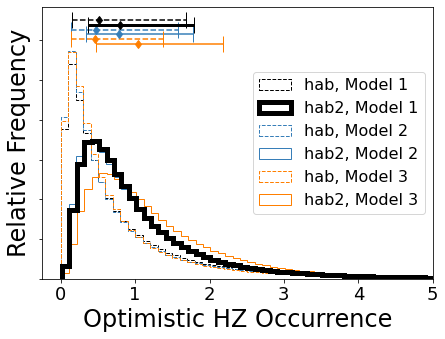

In [9]:
show_stellar_props("extrap_zero", "optimistic", "reliability")
plt.xlabel("Optimistic HZ Occurrence", fontsize = 24)
plt.ylabel("Relative Frequency", fontsize = 24)
plt.savefig(figDir + "/optHzStellar.pdf",bbox_inches='tight')


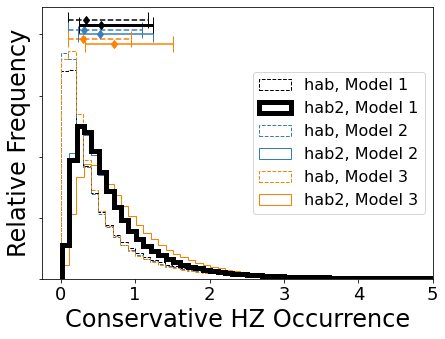

In [10]:
show_stellar_props("extrap_zero", "conservative", "reliability")
plt.xlabel("Conservative HZ Occurrence", fontsize = 24)
plt.ylabel("Relative Frequency", fontsize = 24)
plt.savefig(figDir + "/consHzStellar.pdf",bbox_inches='tight')


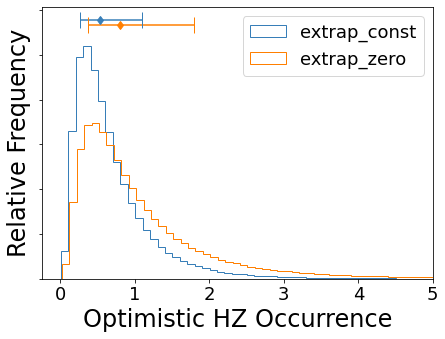

In [11]:
show_extrap("hab2", "optimistic", "reliability")
plt.xlabel("Optimistic HZ Occurrence", fontsize = 24)
plt.ylabel("Relative Frequency", fontsize = 24)
plt.savefig(figDir + "/optHzExtrap.pdf",bbox_inches='tight')


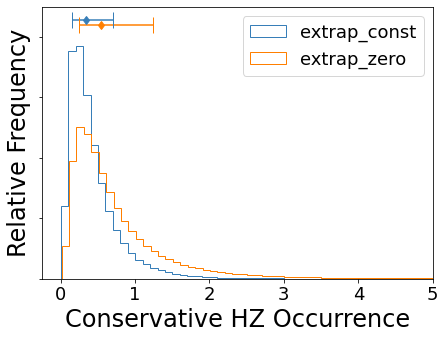

In [12]:
show_extrap("hab2", "conservative", "reliability")
plt.xlabel("Conservative HZ Occurrence", fontsize = 24)
plt.ylabel("Relative Frequency", fontsize = 24)
plt.savefig(figDir + "/consHzExtrap.pdf",bbox_inches='tight')


In [13]:
post = np.load("computeOccurrence3D_dr25_hab2_dualPowerLaw_optimistic_extrap_zero_out/occurenceRatePosteriors.npy")

In [14]:
ut.medianAndErrorbars(post)

[(1.4127506187304504, 1.1776094533180879, 0.5824215538552885),
 (-1.1583853669481745, 0.34501184594173984, 0.3375060294162844),
 (-1.0001293756232097, 0.8545111342697091, 0.7891998402707006),
 (2.563456694315411, 1.7617158043861343, 1.700880870823764)]

In [15]:
hzOcc["hab2"]["extrap_const"]["optimistic"]["reliability"]["fitData"]

[(1.2494383752381402, 0.9285461067035765, 0.49759598776890335),
 (-0.8343573530146127, 0.30302337722107553, 0.2806212418984151),
 (-1.20792134333482, 0.8833733827700443, 0.779653928599694)]

In [16]:
teffTypes = ["hab", "hab2", "K", "G"]
teffRanges = [[4800, 6300], [3900, 6300], [3900, 5300], [5300, 6000] ]
teffLabels = ["4800K -- 6300K", "3900K -- 6300K", "3900K -- 5300K (K)", "5300K -- 6000K (G)"]
radTypes = ["small", "all", "large"]
radRanges = [[0.5, 1.5], [0.5, 2.5], [1.5, 2.5]]
radLabels = ["$0.5$ -- $1.5 R_\oplus$", "$0.5$ -- $2.5 R_\oplus$", "$1.5$ -- $2.5 R_\oplus$"]


# compute the various hab2 occurrence rates
fileName = "hab2Occ.pkl"
if path.exists(fileName): 
    f = open(fileName, "rb")    
    hab2Occ = pickle.load(f)
    f.close()
else:
    hab2Occ = {}
    cs = rm3D.compSpace(periodName = "Insolation", 
                   periodUnits = "Earth Flux",
                   periodRange = (0.2, 2.2), 
                   nPeriod = 61, 
                   radiusName = "Radius", 
                   radiusUnits = "$R_\oplus$",
                   rpRange = (0.5, 2.5), 
                   nRp = 61,
                   tempName = "$T_\mathrm{eff}$", 
                   tempUnits = "$R_\oplus$",
                   tempRange = (3900, 6300), 
                   nTemp = 10)

    model = rm3D.triplePowerLawTeffAvg(cs)
    for tr, teffType in enumerate(teffTypes):
        hab2Occ[teffType] = {}
        for rr, radType in enumerate(radTypes):
            hab2Occ[teffType][radType] = {}
            for extrapType in extrapTypes:
                outDir = "computeOccurrencefixedTeff_dr25_hab2_"  \
                    + model.name + "_" + "optimistic" + "_" + extrapType + "_out"
                print(outDir)
                if not path.exists(outDir): 
                    print("does not exist")
                    continue

                hab2Occ[teffType][radType][extrapType] = {}
                for hzType in hzTypes:
                    hab2Occ[teffType][radType][extrapType][hzType] = {}

                    post = np.load(outDir + "/occurenceRatePosteriors.npy")           
                    hab2Occ[teffType][radType][extrapType][hzType]["dist"], \
                        hab2Occ[teffType][radType][extrapType][hzType]["teff"] \
                        = rm3D.hzOccRate2D(teffRanges[tr], radRanges[rr], post, model, 
                                         cs, nSamples = 10000, hzType = hzType)
                    hab2Occ[teffType][radType][extrapType][hzType]["str"] \
                        = ut.printMedianAndErrorbars(hab2Occ[teffType][radType][extrapType][hzType]["dist"].flatten(), precision=2)
                    hab2Occ[teffType][radType][extrapType][hzType]["teffLabel"] = teffLabels[tr]
                    hab2Occ[teffType][radType][extrapType][hzType]["radLabel"] = radLabels[rr]

    f = open(fileName,"wb")
    pickle.dump(hab2Occ,f)
    f.close()

In [17]:
teffTypes = ["hab", "hab2", "K", "G"]
teffRanges = [[4800, 6300], [3900, 6300], [3900, 5300], [5300, 6000] ]
teffLabels = ["4800K -- 6300K", "3900K -- 6300K", "3900K -- 5300K (K)", "5300K -- 6000K (G)"]
radTypes = ["small", "all", "large"]
radRanges = [[0.5, 1.5], [0.5, 2.5], [1.5, 2.5]]
radLabels = ["$0.5$ -- $1.5 R_\oplus$", "$0.5$ -- $2.5 R_\oplus$", "$1.5$ -- $2.5 R_\oplus$"]


# compute the various hab2 occurrence rates
fileName = "hab2OccDual.pkl"
if path.exists(fileName): 
    f = open(fileName, "rb")    
    hab2OccDual = pickle.load(f)
    f.close()
else:
    hab2OccDual = {}
    cs = rm3D.compSpace(periodName = "Insolation", 
                   periodUnits = "Earth Flux",
                   periodRange = (0.2, 2.2), 
                   nPeriod = 61, 
                   radiusName = "Radius", 
                   radiusUnits = "$R_\oplus$",
                   rpRange = (0.5, 2.5), 
                   nRp = 61,
                   tempName = "$T_\mathrm{eff}$", 
                   tempUnits = "$R_\oplus$",
                   tempRange = (3900, 6300), 
                   nTemp = 10)

    model = rm3D.dualPowerLawFixedTeffAvg(cs)
    for tr, teffType in enumerate(teffTypes):
        hab2OccDual[teffType] = {}
        for rr, radType in enumerate(radTypes):
            hab2OccDual[teffType][radType] = {}
            for extrapType in extrapTypes:
                outDir = "computeOccurrencefixedTeff_dr25_hab2_"  \
                    + model.name + "_" + "optimistic" + "_" + extrapType + "_out"
                print(outDir)
                if not path.exists(outDir): 
                    print("does not exist")
                    continue

                hab2OccDual[teffType][radType][extrapType] = {}
                for hzType in hzTypes:
                    hab2OccDual[teffType][radType][extrapType][hzType] = {}

                    post = np.load(outDir + "/occurenceRatePosteriors.npy")           
                    hab2OccDual[teffType][radType][extrapType][hzType]["dist"], \
                        hab2OccDual[teffType][radType][extrapType][hzType]["teff"] \
                        = rm3D.hzOccRate2D(teffRanges[tr], radRanges[rr], post, model, 
                                         cs, nSamples = 10000, hzType = hzType)
                    hab2OccDual[teffType][radType][extrapType][hzType]["str"] \
                        = ut.printMedianAndErrorbars(hab2OccDual[teffType][radType][extrapType][hzType]["dist"].flatten(), precision=2)
                    hab2OccDual[teffType][radType][extrapType][hzType]["teffLabel"] = teffLabels[tr]
                    hab2OccDual[teffType][radType][extrapType][hzType]["radLabel"] = radLabels[rr]

    f = open(fileName,"wb")
    pickle.dump(hab2OccDual,f)
    f.close()

In [18]:
teffTypes = ["hab", "hab2", "K", "G"]
teffRanges = [[4800, 6300], [3900, 6300], [3900, 5300], [5300, 6000] ]
teffLabels = ["4800K -- 6300K", "3900K -- 6300K", "3900K -- 5300K (K)", "5300K -- 6000K (G)"]
radTypes = ["small", "all", "large"]
radRanges = [[0.5, 1.5], [0.5, 2.5], [1.5, 2.5]]
radLabels = ["$0.5$ -- $1.5 R_\oplus$", "$0.5$ -- $2.5 R_\oplus$", "$1.5$ -- $2.5 R_\oplus$"]


# compute the various hab2 occurrence rates
fileName = "hab2OccDualNoGeom.pkl"
if path.exists(fileName): 
    f = open(fileName, "rb")    
    hab2OccDualNoGeom = pickle.load(f)
    f.close()
else:
    hab2OccDualNoGeom = {}
    cs = rm3D.compSpace(periodName = "Insolation", 
                   periodUnits = "Earth Flux",
                   periodRange = (0.2, 2.2), 
                   nPeriod = 61, 
                   radiusName = "Radius", 
                   radiusUnits = "$R_\oplus$",
                   rpRange = (0.5, 2.5), 
                   nRp = 61,
                   tempName = "$T_\mathrm{eff}$", 
                   tempUnits = "$R_\oplus$",
                   tempRange = (3900, 6300), 
                   nTemp = 10)

    model = rm3D.dualPowerLaw(cs)
    for tr, teffType in enumerate(teffTypes):
        hab2OccDualNoGeom[teffType] = {}
        for rr, radType in enumerate(radTypes):
            hab2OccDualNoGeom[teffType][radType] = {}
            for extrapType in extrapTypes:
                outDir = "computeOccurrencefixedTeff_dr25_hab2_"  \
                    + model.name + "_" + "optimistic" + "_" + extrapType + "_out"
                print(outDir)
                if not path.exists(outDir): 
                    print("does not exist")
                    continue

                hab2OccDualNoGeom[teffType][radType][extrapType] = {}
                for hzType in hzTypes:
                    hab2OccDualNoGeom[teffType][radType][extrapType][hzType] = {}

                    post = np.load(outDir + "/occurenceRatePosteriors.npy")           
                    hab2OccDualNoGeom[teffType][radType][extrapType][hzType]["dist"], \
                        hab2OccDualNoGeom[teffType][radType][extrapType][hzType]["teff"] \
                        = rm3D.hzOccRate2D(teffRanges[tr], radRanges[rr], post, model, 
                                         cs, nSamples = 10000, hzType = hzType)
                    hab2OccDualNoGeom[teffType][radType][extrapType][hzType]["str"] \
                        = ut.printMedianAndErrorbars(hab2OccDualNoGeom[teffType][radType][extrapType][hzType]["dist"].flatten(), precision=2)
                    hab2OccDualNoGeom[teffType][radType][extrapType][hzType]["teffLabel"] = teffLabels[tr]
                    hab2OccDualNoGeom[teffType][radType][extrapType][hzType]["radLabel"] = radLabels[rr]

    f = open(fileName,"wb")
    pickle.dump(hab2OccDualNoGeom,f)
    f.close()

In [19]:
teffTypes = ["hab", "hab2", "K", "G"]
teffRanges = [[4800, 6300], [3900, 6300], [3900, 5300], [5300, 6000] ]
teffLabels = ["4800K -- 6300K", "3900K -- 6300K", "3900K -- 5300K (K)", "5300K -- 6000K (G)"]
radTypes = ["small", "all", "large"]
radRanges = [[0.5, 1.5], [0.5, 2.5], [1.5, 2.5]]
radLabels = ["$0.5$ -- $1.5 R_\oplus$", "$0.5$ -- $2.5 R_\oplus$", "$1.5$ -- $2.5 R_\oplus$"]


# compute the various hab2 occurrence rates
fileName = "hab2OccTripleNoGeom.pkl"
if path.exists(fileName): 
    f = open(fileName, "rb")    
    hab2OccTripleNoGeom = pickle.load(f)
    f.close()
else:
    hab2OccTripleNoGeom = {}
    cs = rm3D.compSpace(periodName = "Insolation", 
                   periodUnits = "Earth Flux",
                   periodRange = (0.2, 2.2), 
                   nPeriod = 61, 
                   radiusName = "Radius", 
                   radiusUnits = "$R_\oplus$",
                   rpRange = (0.5, 2.5), 
                   nRp = 61,
                   tempName = "$T_\mathrm{eff}$", 
                   tempUnits = "$R_\oplus$",
                   tempRange = (3900, 6300), 
                   nTemp = 10)

    model = rm3D.triplePowerLaw(cs)
    for tr, teffType in enumerate(teffTypes):
        hab2OccTripleNoGeom[teffType] = {}
        for rr, radType in enumerate(radTypes):
            hab2OccTripleNoGeom[teffType][radType] = {}
            for extrapType in extrapTypes:
                outDir = "computeOccurrencefixedTeff_dr25_hab2_"  \
                    + model.name + "_" + "optimistic" + "_" + extrapType + "_out"
                print(outDir)
                if not path.exists(outDir): 
                    print("does not exist")
                    continue

                hab2OccTripleNoGeom[teffType][radType][extrapType] = {}
                for hzType in hzTypes:
                    hab2OccTripleNoGeom[teffType][radType][extrapType][hzType] = {}

                    post = np.load(outDir + "/occurenceRatePosteriors.npy")           
                    hab2OccTripleNoGeom[teffType][radType][extrapType][hzType]["dist"], \
                        hab2OccTripleNoGeom[teffType][radType][extrapType][hzType]["teff"] \
                        = rm3D.hzOccRate2D(teffRanges[tr], radRanges[rr], post, model, 
                                         cs, nSamples = 10000, hzType = hzType)
                    hab2OccTripleNoGeom[teffType][radType][extrapType][hzType]["str"] \
                        = ut.printMedianAndErrorbars(hab2OccTripleNoGeom[teffType][radType][extrapType][hzType]["dist"].flatten(), precision=2)
                    hab2OccTripleNoGeom[teffType][radType][extrapType][hzType]["teffLabel"] = teffLabels[tr]
                    hab2OccTripleNoGeom[teffType][radType][extrapType][hzType]["radLabel"] = radLabels[rr]

    f = open(fileName,"wb")
    pickle.dump(hab2OccTripleNoGeom,f)
    f.close()

In [20]:
# compute the various hab occurrence rates
fileName = "habOcc.pkl"
if path.exists(fileName): 
    f = open(fileName, "rb")    
    habOcc = pickle.load(f)
    f.close()
else:
    habOcc = {}
    cs = rm3D.compSpace(periodName = "Insolation", 
                   periodUnits = "Earth Flux",
                   periodRange = (0.2, 2.2), 
                   nPeriod = 61, 
                   radiusName = "Radius", 
                   radiusUnits = "$R_\oplus$",
                   rpRange = (0.5, 2.5), 
                   nRp = 61,
                   tempName = "$T_\mathrm{eff}$", 
                   tempUnits = "$R_\oplus$",
                   tempRange = (4800, 6300), 
                   nTemp = 10)

    model = rm3D.triplePowerLawTeffAvg(cs)
    for tr, teffType in enumerate(teffTypes):
        habOcc[teffType] = {}
        for rr, radType in enumerate(radTypes):
            habOcc[teffType][radType] = {}
            for extrapType in extrapTypes:
                outDir = "computeOccurrencefixedTeff_dr25_hab_"  \
                    + model.name + "_" + "optimistic" + "_" + extrapType + "_out"
                print(outDir)
                if not path.exists(outDir): 
                    print("does not exist")
                    continue

                habOcc[teffType][radType][extrapType] = {}
                for hzType in hzTypes:
                    habOcc[teffType][radType][extrapType][hzType] = {}

                    post = np.load(outDir + "/occurenceRatePosteriors.npy")           
                    habOcc[teffType][radType][extrapType][hzType]["dist"], \
                        habOcc[teffType][radType][extrapType][hzType]["teff"] \
                        = rm3D.hzOccRate2D(teffRanges[tr], radRanges[rr], post, model, 
                                         cs, nSamples = 10000, hzType = hzType)
                    habOcc[teffType][radType][extrapType][hzType]["str"] \
                        = ut.printMedianAndErrorbars(habOcc[teffType][radType][extrapType][hzType]["dist"].flatten(), precision=2)
                    habOcc[teffType][radType][extrapType][hzType]["teffLabel"] = teffLabels[tr]
                    habOcc[teffType][radType][extrapType][hzType]["radLabel"] = radLabels[rr]

    f = open(fileName,"wb")
    pickle.dump(habOcc,f)
    f.close()

In [21]:
print("% optimistic with the hab fit using triplePowerLawTeffAvg (model 1)")
for teffType in teffTypes:
    print(" & " + habOcc[teffType]["small"]["extrap_zero"]["optimistic"]["teffLabel"])
print("\\\\")
print("\\hline")
for radType in radTypes:
    print(habOcc["hab"][radType]["extrap_zero"]["optimistic"]["radLabel"])
    for teffType in teffTypes:
        if (radType == "small") & (teffType == "hab"):
            print("& $\\boldsymbol{" + habOcc[teffType][radType]["extrap_const"]["optimistic"]["str"] + "}$")
            print("-- $\\boldsymbol{" + habOcc[teffType][radType]["extrap_zero"]["optimistic"]["str"] + "}$")
        else:
            print("& $" + habOcc[teffType][radType]["extrap_const"]["optimistic"]["str"] + "$")
            print("-- $" + habOcc[teffType][radType]["extrap_zero"]["optimistic"]["str"] + "$")
    print("\\\\")

% optimistic with the hab fit using triplePowerLawTeffAvg (model 1)
 & 4800K -- 6300K
 & 3900K -- 6300K
 & 3900K -- 5300K (K)
 & 5300K -- 6000K (G)
\\
\hline
$0.5$ -- $1.5 R_\oplus$
& $\boldsymbol{0.26^{+0.52}_{-0.18}}$
-- $\boldsymbol{0.51^{+1.17}_{-0.36}}$
& $0.23^{+0.48}_{-0.16}$
-- $0.37^{+0.92}_{-0.27}$
& $0.19^{+0.38}_{-0.13}$
-- $0.27^{+0.55}_{-0.19}$
& $0.28^{+0.53}_{-0.19}$
-- $0.56^{+1.21}_{-0.39}$
\\
$0.5$ -- $2.5 R_\oplus$
& $0.49^{+0.59}_{-0.24}$
-- $0.89^{+1.38}_{-0.48}$
& $0.44^{+0.56}_{-0.23}$
-- $0.68^{+1.11}_{-0.40}$
& $0.37^{+0.47}_{-0.20}$
-- $0.49^{+0.65}_{-0.28}$
& $0.51^{+0.58}_{-0.24}$
-- $0.97^{+1.37}_{-0.52}$
\\
$1.5$ -- $2.5 R_\oplus$
& $0.21^{+0.11}_{-0.07}$
-- $0.34^{+0.28}_{-0.14}$
& $0.19^{+0.12}_{-0.09}$
-- $0.27^{+0.25}_{-0.15}$
& $0.16^{+0.11}_{-0.08}$
-- $0.19^{+0.15}_{-0.11}$
& $0.22^{+0.09}_{-0.06}$
-- $0.38^{+0.23}_{-0.14}$
\\


In [22]:
shuffledRadTypes = [radTypes[i] for i in [0,2,1]]
print("% optimistic with the hab2 fit using triplePowerLawTeffAvg (model 1)")
print("Planet Radius ")
for teffType in teffTypes:
    print(" & " + hab2Occ[teffType]["small"]["extrap_zero"]["optimistic"]["teffLabel"])
print("\\\\")
print("\\hline")
print("& low -- high & low -- high & low -- high & low -- high \\\\")
print("\\hline")
print("% conservative with the hab2 fit using triplePowerLawTeffAvg (model 1) \\\\")
print("& \\multicolumn{4}{c}{{\\bf Conservative Habitable Zone}} \\\\")
print("& \\multicolumn{4}{c}{Model 1} \\\\")
for radType in shuffledRadTypes:
    print(hab2Occ["hab2"][radType]["extrap_zero"]["conservative"]["radLabel"])
    for teffType in teffTypes:
        if (radType == "small") & (teffType == "hab"):
            print("& $\\boldsymbol{" + hab2Occ[teffType][radType]["extrap_const"]["conservative"]["str"] + "}$")
            print("-- $\\boldsymbol{" + hab2Occ[teffType][radType]["extrap_zero"]["conservative"]["str"] + "}$")
        else:
            print("& $" + hab2Occ[teffType][radType]["extrap_const"]["conservative"]["str"] + "$")
            print("-- $" + hab2Occ[teffType][radType]["extrap_zero"]["conservative"]["str"] + "$")
    print("\\\\")

print("% conservative with the hab2 fit with triplePowerLaw (model 2) \\\\")
print("& \\multicolumn{4}{c}{Model 2} \\\\")
for radType in shuffledRadTypes:
    print(hab2OccTripleNoGeom["hab2"][radType]["extrap_zero"]["conservative"]["radLabel"])
    for teffType in teffTypes:
        if (radType == "small") & (teffType == "hab"):
            print("& $\\boldsymbol{" + hab2OccTripleNoGeom[teffType][radType]["extrap_const"]["conservative"]["str"] + "}$")
            print("-- $\\boldsymbol{" + hab2OccTripleNoGeom[teffType][radType]["extrap_zero"]["conservative"]["str"] + "}$")
        else:
            print("& $" + hab2OccTripleNoGeom[teffType][radType]["extrap_const"]["conservative"]["str"] + "$")
            print("-- $" + hab2OccTripleNoGeom[teffType][radType]["extrap_zero"]["conservative"]["str"] + "$")
    print("\\\\")
    
print("% conservative with the hab2 fit with dualPowerLawFixedTeffAvg (model 3) \\\\")
print("& \\multicolumn{4}{c}{Model 3} \\\\")
for radType in shuffledRadTypes:
    print(hab2OccDual["hab2"][radType]["extrap_zero"]["conservative"]["radLabel"])
    for teffType in teffTypes:
        if (radType == "small") & (teffType == "hab"):
            print("& $\\boldsymbol{" + hab2OccDual[teffType][radType]["extrap_const"]["conservative"]["str"] + "}$")
            print("-- $\\boldsymbol{" + hab2OccDual[teffType][radType]["extrap_zero"]["conservative"]["str"] + "}$")
        else:
            print("& $" + hab2OccDual[teffType][radType]["extrap_const"]["conservative"]["str"] + "$")
            print("-- $" + hab2OccDual[teffType][radType]["extrap_zero"]["conservative"]["str"] + "$")
    print("\\\\")

print("& \\multicolumn{4}{c}{{\\bf Optimistic Habitable Zone}} \\\\")
print("& \\multicolumn{4}{c}{Model 1} \\\\")
for radType in shuffledRadTypes:
    print(hab2Occ["hab2"][radType]["extrap_zero"]["optimistic"]["radLabel"])
    for teffType in teffTypes:
        if (radType == "small") & (teffType == "hab"):
            print("& $\\boldsymbol{" + hab2Occ[teffType][radType]["extrap_const"]["optimistic"]["str"] + "}$")
            print("-- $\\boldsymbol{" + hab2Occ[teffType][radType]["extrap_zero"]["optimistic"]["str"] + "}$")
        else:
            print("& $" + hab2Occ[teffType][radType]["extrap_const"]["optimistic"]["str"] + "$")
            print("-- $" + hab2Occ[teffType][radType]["extrap_zero"]["optimistic"]["str"] + "$")
    print("\\\\")

print("% optimistic with the hab2 fit with triplePowerLaw (model 2) \\\\")
print("& \\multicolumn{4}{c}{Model 2} \\\\")
for radType in shuffledRadTypes:
    print(hab2OccTripleNoGeom["hab2"][radType]["extrap_zero"]["optimistic"]["radLabel"])
    for teffType in teffTypes:
        if (radType == "small") & (teffType == "hab"):
            print("& $\\boldsymbol{" + hab2OccTripleNoGeom[teffType][radType]["extrap_const"]["optimistic"]["str"] + "}$")
            print("-- $\\boldsymbol{" + hab2OccTripleNoGeom[teffType][radType]["extrap_zero"]["optimistic"]["str"] + "}$")
        else:
            print("& $" + hab2OccTripleNoGeom[teffType][radType]["extrap_const"]["optimistic"]["str"] + "$")
            print("-- $" + hab2OccTripleNoGeom[teffType][radType]["extrap_zero"]["optimistic"]["str"] + "$")
    print("\\\\")
    
print("% optimistic with the hab2 fit with dualPowerLawFixedTeffAvg (model 3) \\\\")
print("& \\multicolumn{4}{c}{Model 3} \\\\")
for radType in shuffledRadTypes:
    print(hab2OccDual["hab2"][radType]["extrap_zero"]["optimistic"]["radLabel"])
    for teffType in teffTypes:
        if (radType == "small") & (teffType == "hab"):
            print("& $\\boldsymbol{" + hab2OccDual[teffType][radType]["extrap_const"]["optimistic"]["str"] + "}$")
            print("-- $\\boldsymbol{" + hab2OccDual[teffType][radType]["extrap_zero"]["optimistic"]["str"] + "}$")
        else:
            print("& $" + hab2OccDual[teffType][radType]["extrap_const"]["optimistic"]["str"] + "$")
            print("-- $" + hab2OccDual[teffType][radType]["extrap_zero"]["optimistic"]["str"] + "$")
    print("\\\\")



% optimistic with the hab2 fit using triplePowerLawTeffAvg (model 1)
Planet Radius 
 & 4800K -- 6300K
 & 3900K -- 6300K
 & 3900K -- 5300K (K)
 & 5300K -- 6000K (G)
\\
\hline
& low -- high & low -- high & low -- high & low -- high \\
\hline
% conservative with the hab2 fit using triplePowerLawTeffAvg (model 1) \\
& \multicolumn{4}{c}{{\bf Conservative Habitable Zone}} \\
& \multicolumn{4}{c}{Model 1} \\
$0.5$ -- $1.5 R_\oplus$
& $\boldsymbol{0.34^{+0.37}_{-0.18}}$
-- $\boldsymbol{0.54^{+0.69}_{-0.30}}$
& $0.30^{+0.32}_{-0.16}$
-- $0.44^{+0.57}_{-0.24}$
& $0.27^{+0.25}_{-0.13}$
-- $0.36^{+0.37}_{-0.18}$
& $0.35^{+0.37}_{-0.19}$
-- $0.58^{+0.71}_{-0.32}$
\\
$1.5$ -- $2.5 R_\oplus$
& $0.16^{+0.07}_{-0.04}$
-- $0.24^{+0.14}_{-0.08}$
& $0.15^{+0.06}_{-0.04}$
-- $0.20^{+0.13}_{-0.07}$
& $0.13^{+0.05}_{-0.04}$
-- $0.16^{+0.06}_{-0.05}$
& $0.17^{+0.06}_{-0.05}$
-- $0.26^{+0.12}_{-0.08}$
\\
$0.5$ -- $2.5 R_\oplus$
& $0.51^{+0.41}_{-0.21}$
-- $0.80^{+0.79}_{-0.36}$
& $0.46^{+0.36}_{-0.19}$
-- $0.

In [23]:
np.median(hab2Occ["hab2"]["small"]["extrap_const"]["optimistic"]["dist"], 1).shape

(2400,)

In [24]:
def temp_vs_hzOcc(dist1, teff1, dist2, teff2, newFigure=True):
    if newFigure:
        plt.figure(figsize=(7,5))
#     a, b, c, d, e = np.percentile(dist1, [5, 10, 50, 90, 95], axis=1)
#     plt.fill_between(teff1, a, e, color="k", alpha=0.05, edgecolor="none")
#     plt.fill_between(teff1, b, d, color="k", alpha=0.2, edgecolor="none")
#     plt.plot(teff1, c, "k", lw=1)
#     a, b, c, d, e = np.percentile(dist2, [5,10, 50, 90, 95], axis=1)
#     plt.fill_between(teff2, a, e, color="k", alpha=0.05, edgecolor="none")
#     plt.fill_between(teff2, b, d, color="k", alpha=0.2, edgecolor="none")
#     plt.plot(teff2, c, "k", lw=1)

    a, b, c = np.percentile(dist1, [16, 50, 84], axis=1)
    plt.fill_between(teff1, a, c, color="k", alpha=0.1, edgecolor="none")
    plt.plot(teff1, b, "k", lw=1)
    a, b, c = np.percentile(dist2, [16, 50, 84], axis=1)
    plt.fill_between(teff2, a, c, color="k", alpha=0.1, edgecolor="none")
    plt.plot(teff2, b, "k", lw=1)
    plt.ylim(0,4)
    
    plt.tick_params(labelsize = 18);
    plt.xlabel("Effective Temperature", fontsize=24)
    plt.ylabel("HZ Occurrence", fontsize=24)
    plt.autoscale(enable=True, axis='x', tight=True)



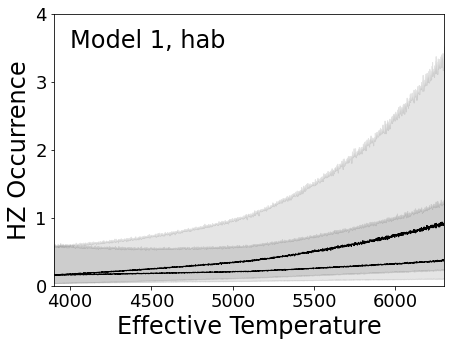

In [25]:
dist1 = habOcc["hab2"]["small"]["extrap_zero"]["optimistic"]["dist"]
teff1 = habOcc["hab2"]["small"]["extrap_zero"]["optimistic"]["teff"]
dist2 = habOcc["hab2"]["small"]["extrap_const"]["optimistic"]["dist"]
teff2 = habOcc["hab2"]["small"]["extrap_const"]["optimistic"]["teff"]
temp_vs_hzOcc(dist1, teff1, dist2, teff2)
plt.text(4000, 3.5, "Model 1, hab", fontsize=24)
plt.savefig(figDir + "/hzTeffVsHZOcc_hab_teff.pdf",bbox_inches='tight')


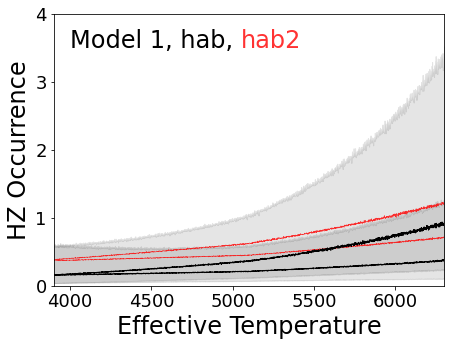

In [26]:
plt.figure(figsize=(7,5))

dist1 = hab2Occ["hab2"]["small"]["extrap_zero"]["optimistic"]["dist"]
teff1 = hab2Occ["hab2"]["small"]["extrap_zero"]["optimistic"]["teff"]
dist2 = hab2Occ["hab2"]["small"]["extrap_const"]["optimistic"]["dist"]
teff2 = hab2Occ["hab2"]["small"]["extrap_const"]["optimistic"]["teff"]
a, b, c = np.percentile(dist1, [16, 50, 84], axis=1)
plt.plot(teff1, b, "r", lw=0.5, alpha=0.8)
a, b, c = np.percentile(dist2, [16, 50, 84], axis=1)
plt.plot(teff2, b, "r", lw=0.5, alpha=0.8)
dist1 = habOcc["hab2"]["small"]["extrap_zero"]["optimistic"]["dist"]
teff1 = habOcc["hab2"]["small"]["extrap_zero"]["optimistic"]["teff"]
dist2 = habOcc["hab2"]["small"]["extrap_const"]["optimistic"]["dist"]
teff2 = habOcc["hab2"]["small"]["extrap_const"]["optimistic"]["teff"]
temp_vs_hzOcc(dist1, teff1, dist2, teff2, newFigure=False)
plt.text(4000, 3.5, "Model 1, hab,", fontsize=24)
plt.text(5050, 3.5, "hab2", c='r', fontsize=24, alpha=0.8)
plt.savefig(figDir + "/hzTeffVsHZOcc_hab_teff.pdf",bbox_inches='tight')


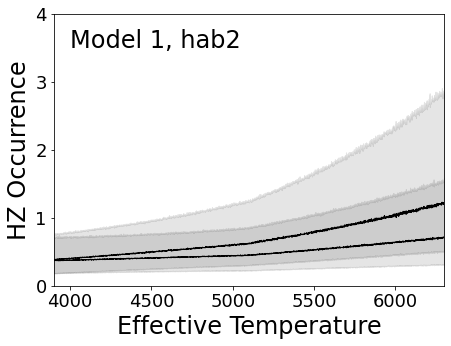

In [27]:
dist1 = hab2Occ["hab2"]["small"]["extrap_zero"]["optimistic"]["dist"]
teff1 = hab2Occ["hab2"]["small"]["extrap_zero"]["optimistic"]["teff"]
dist2 = hab2Occ["hab2"]["small"]["extrap_const"]["optimistic"]["dist"]
teff2 = hab2Occ["hab2"]["small"]["extrap_const"]["optimistic"]["teff"]
temp_vs_hzOcc(dist1, teff1, dist2, teff2)
plt.text(4000, 3.5, "Model 1, hab2", fontsize=24)
plt.savefig(figDir + "/hzTeffVsHZOcc_hab2_teff.pdf",bbox_inches='tight')


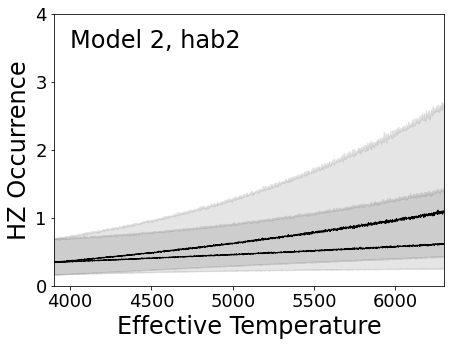

In [28]:
dist1 = hab2OccTripleNoGeom["hab2"]["small"]["extrap_zero"]["optimistic"]["dist"]
teff1 = hab2OccTripleNoGeom["hab2"]["small"]["extrap_zero"]["optimistic"]["teff"]
dist2 = hab2OccTripleNoGeom["hab2"]["small"]["extrap_const"]["optimistic"]["dist"]
teff2 = hab2OccTripleNoGeom["hab2"]["small"]["extrap_const"]["optimistic"]["teff"]
temp_vs_hzOcc(dist1, teff1, dist2, teff2)
plt.text(4000, 3.5, "Model 2, hab2", fontsize=24)
plt.savefig(figDir + "/hzTeffVsHZOcc_hab2_triple.pdf",bbox_inches='tight')


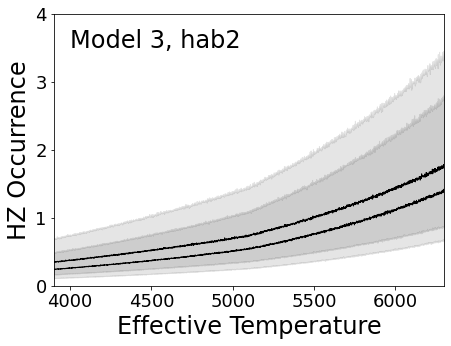

In [29]:
dist1 = hab2OccDual["hab2"]["small"]["extrap_zero"]["optimistic"]["dist"]
teff1 = hab2OccDual["hab2"]["small"]["extrap_zero"]["optimistic"]["teff"]
dist2 = hab2OccDual["hab2"]["small"]["extrap_const"]["optimistic"]["dist"]
teff2 = hab2OccDual["hab2"]["small"]["extrap_const"]["optimistic"]["teff"]
temp_vs_hzOcc(dist1, teff1, dist2, teff2)
plt.text(4000, 3.5, "Model 3, hab2", fontsize=24)
plt.savefig(figDir + "/hzTeffVsHZOcc_hab2_noteff.pdf",bbox_inches='tight')


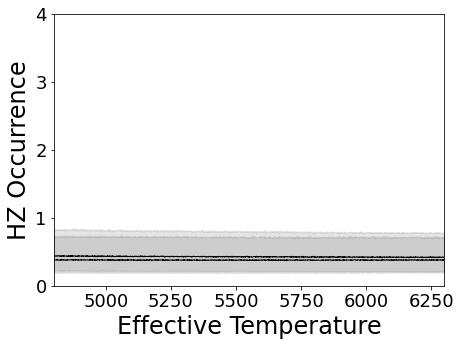

In [30]:
dist1 = hzOccDual["hab2"]["extrap_zero"]["optimistic"]["reliability"]["dist"]
teff1 = hzOccDual["hab2"]["extrap_zero"]["optimistic"]["reliability"]["teff"]
dist2 = hzOccDual["hab2"]["extrap_const"]["optimistic"]["reliability"]["dist"]
teff2 = hzOccDual["hab2"]["extrap_const"]["optimistic"]["reliability"]["teff"]
temp_vs_hzOcc(dist1, teff1, dist2, teff2)
plt.savefig(figDir + "/hzTeffVsHZOcc_hab2_dual.pdf",bbox_inches='tight')


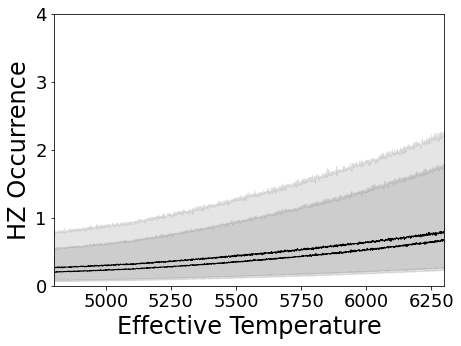

In [31]:
dist1 = hzOcc["hab"]["extrap_zero"]["optimistic"]["reliability"]["dist"]
teff1 = hzOcc["hab"]["extrap_zero"]["optimistic"]["reliability"]["teff"]
dist2 = hzOcc["hab"]["extrap_const"]["optimistic"]["reliability"]["dist"]
teff2 = hzOcc["hab"]["extrap_const"]["optimistic"]["reliability"]["teff"]
temp_vs_hzOcc(dist1, teff1, dist2, teff2)
plt.savefig(figDir + "/hzTeffVsHZOcc_hab_noteff.pdf",bbox_inches='tight')


In [32]:
alpha = 0.8
print((alpha + 7/3)*3/4)
print((alpha + 7/3)*3/4-1)
print(5*((alpha + 7/3)*3/4-1))
print(4*((alpha + 7/3)*3/4-1))

2.3500000000000005
1.3500000000000005
6.750000000000003
5.400000000000002


In [33]:
aicDistTripleTeff = np.load("computeOccurrencefixedTeff_dr25_hab2_triplePowerLawTeffAvg_optimistic_extrap_zero_out/aicDist.npy")
aicDistDualTeff = np.load("computeOccurrencefixedTeff_dr25_hab2_dualPowerLawFixedTeffAvg_optimistic_extrap_zero_out/aicDist.npy")
aicDistConstTeff = np.load("computeOccurrencefixedTeff_dr25_hab2_constantFixedTeffAvg_optimistic_extrap_zero_out/aicDist.npy")
aicDistDual = np.load("computeOccurrencefixedTeff_dr25_hab2_dualPowerLaw_optimistic_extrap_zero_out/aicDist.npy")
aicDistTriple = np.load("computeOccurrencefixedTeff_dr25_hab2_triplePowerLaw_optimistic_extrap_zero_out/aicDist.npy")



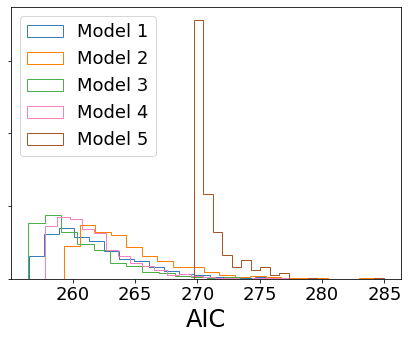

In [34]:
plt.figure(figsize=(7,5))
plt.hist(np.median(aicDistTripleTeff, 1), 20, histtype="step", color=cbc[0], density=True);
plt.hist(np.median(aicDistTriple, 1), 20, histtype="step", color=cbc[1], density=True);
plt.hist(np.median(aicDistDualTeff, 1), 20, histtype="step", color=cbc[2], density=True);
plt.hist(np.median(aicDistDual, 1), 20, histtype="step", color=cbc[3], density=True);
plt.hist(np.median(aicDistConstTeff, 1), 20, histtype="step", color=cbc[4], density=True);
plt.legend(["Model 1", "Model 2", "Model 3", "Model 4", "Model 5"], fontsize=18)
plt.gca().set_yticklabels([])
plt.tick_params(labelsize = 18);
plt.xlabel("AIC", fontsize=24)
plt.savefig(figDir + "/aicDists.pdf",bbox_inches='tight')


In [35]:
MMAic = np.zeros(5)
MMAic[0] = np.median(np.median(aicDistTripleTeff, 1))
MMAic[1] = np.median(np.median(aicDistTriple, 1))
MMAic[2] = np.median(np.median(aicDistDualTeff, 1))
MMAic[3] = np.median(np.median(aicDistDual, 1))
MMAic[4] = np.median(np.median(aicDistConstTeff, 1))

for i in range(len(MMAic)):
    print("Model " + str(i+1) + ": " + str(MMAic[i]))

print("model 1: " + str(np.median(np.median(aicDistTripleTeff, 1))))
print("model 2: " + str(np.median(np.median(aicDistTriple, 1))))
print("model 3: " + str(np.median(np.median(aicDistDualTeff, 1))))
print("model 4: " + str(np.median(np.median(aicDistDual, 1))))
print("model 5: " + str(np.median(np.median(aicDistConstTeff, 1))))


Model 1: 260.992254813561
Model 2: 263.36445649551206
Model 3: 259.5373815201263
Model 4: 260.972621619571
Model 5: 270.33726519171745
model 1: 260.992254813561
model 2: 263.36445649551206
model 3: 259.5373815201263
model 4: 260.972621619571
model 5: 270.33726519171745


In [36]:
print("% AIC analysis table")
print("Model & Median of Median AIC & Relative Likelihood ")
print("\\\\")
print("\\hline")
for i in range(len(MMAic)):
    print(str(i+1) + " & " + str(np.round(MMAic[i], 1)) + " & " 
          + str(np.round(np.exp((MMAic[0] - MMAic[i])/2), 2)) + " \\\\")


% AIC analysis table
Model & Median of Median AIC & Relative Likelihood 
\\
\hline
1 & 261.0 & 1.0 \\
2 & 263.4 & 0.31 \\
3 & 259.5 & 2.07 \\
4 & 261.0 & 1.01 \\
5 & 270.3 & 0.01 \\


In [37]:
def print_stellar_types(data, extrapType, index):
    for stellarType in stellarTypes:
        stats = data[stellarType][extrapType]["optimistic"]["reliability"]["fitData"]
        print("& $" + str(round(stats[index][0], 2)) + "^{+" 
              + str(round(stats[index][1], 2)) + "}_{-" + str(round(stats[index][2], 2)) + "}$")

def print_pop_table(data, modelNum, hasGamma):
    print("& \\multicolumn{8}{c}{Model " + str(modelNum) + "} \\\\")
    print("& \\multicolumn{4}{c}{extrap\_zero} & \\multicolumn{4}{c}{extrap\_const} \\\\")
    print("$F_0$")
    print_stellar_types(data, "extrap_zero", 0)
    print_stellar_types(data, "extrap_const", 0)
    print("\\\\")
    print("$\\alpha$")
    print_stellar_types(data, "extrap_zero", 2)
    print_stellar_types(data, "extrap_const", 2)
    print("\\\\")
    print("$\\beta$")
    print_stellar_types(data, "extrap_zero", 1)
    print_stellar_types(data, "extrap_const", 1)
    print("\\\\")
    if hasGamma:
        print("$\\gamma$")
        print_stellar_types(data, "extrap_zero", 3)
        print_stellar_types(data, "extrap_const", 3)
        print("\\\\")


In [38]:
print("% zero extrapolation")
for stellarType in stellarTypes:
    print(" & " + stellarType)
for stellarType in stellarTypes:
    print(" & " + stellarType)
print("\\\\")
print("\\hline")
print_pop_table(hzOccTeff, 1, True)
print_pop_table(hzOccTriple, 2, True)
print_pop_table(hzOcc, 3, False)


% zero extrapolation
 & hab
 & hab2
 & GK
 & FGK
 & hab
 & hab2
 & GK
 & FGK
\\
\hline
& \multicolumn{8}{c}{Model 1} \\
& \multicolumn{4}{c}{extrap\_zero} & \multicolumn{4}{c}{extrap\_const} \\
$F_0$
& $1.41^{+2.12}_{-0.77}$
& $1.46^{+1.18}_{-0.59}$
& $1.12^{+0.83}_{-0.44}$
& $2.05^{+2.14}_{-0.98}$
& $0.7^{+0.77}_{-0.32}$
& $1.02^{+0.66}_{-0.37}$
& $0.89^{+0.64}_{-0.33}$
& $1.24^{+1.03}_{-0.51}$
\\
$\alpha$
& $-0.51^{+1.35}_{-1.15}$
& $-1.03^{+0.83}_{-0.77}$
& $-0.9^{+0.87}_{-0.78}$
& $-0.96^{+0.87}_{-0.78}$
& $-0.29^{+1.39}_{-1.18}$
& $-0.96^{+0.83}_{-0.74}$
& $-0.8^{+0.93}_{-0.83}$
& $-1.0^{+0.84}_{-0.77}$
\\
$\beta$
& $-1.13^{+0.54}_{-0.5}$
& $-1.15^{+0.34}_{-0.33}$
& $-1.08^{+0.36}_{-0.34}$
& $-1.21^{+0.34}_{-0.32}$
& $-0.43^{+0.46}_{-0.4}$
& $-0.78^{+0.3}_{-0.28}$
& $-0.84^{+0.33}_{-0.3}$
& $-0.82^{+0.3}_{-0.27}$
\\
$\gamma$
& $0.25^{+3.39}_{-3.47}$
& $-1.03^{+1.66}_{-1.64}$
& $-1.98^{+1.75}_{-1.69}$
& $-1.15^{+1.64}_{-1.66}$
& $-2.13^{+3.06}_{-3.13}$
& $-2.33^{+1.47}_{-1.46}$
& $

In [39]:
def print_stellar_occur(data, modelNum, hzType):
    print("Model " + str(modelNum))
    for stellarType in stellarTypes:
        print(" & $" 
              + data[stellarType]["extrap_const"][hzType]["reliability"]["str"] + "$ -- $"
              + data[stellarType]["extrap_zero"][hzType]["reliability"]["str"] + "$ ")
    print("\\\\")

print("% rp in [0.5, 1.5], T in [4800, 6300], HZ occurrence")
for stellarType in stellarTypes:
    print(" & " + stellarType)
print("\\\\")
print("\\hline")
print("& low -- high & low -- high & low -- high & low -- high \\\\")
print("\\hline")
print("& \\multicolumn{4}{c}{{\\bf Conservative Habitable Zone}} \\\\")
print_stellar_occur(hzOccTeff, 1, "conservative")
print_stellar_occur(hzOccTriple, 2, "conservative")
print_stellar_occur(hzOcc, 3, "conservative")
print("& \\multicolumn{4}{c}{{\\bf Optimistic Habitable Zone}} \\\\")
print_stellar_occur(hzOccTeff, 1, "optimistic")
print_stellar_occur(hzOccTriple, 2, "optimistic")
print_stellar_occur(hzOcc, 3, "optimistic")


% rp in [0.5, 1.5], T in [4800, 6300], HZ occurrence
 & hab
 & hab2
 & GK
 & FGK
\\
\hline
& low -- high & low -- high & low -- high & low -- high \\
\hline
& \multicolumn{4}{c}{{\bf Conservative Habitable Zone}} \\
Model 1
 & $0.15^{+0.32}_{-0.11}$ -- $0.34^{+0.83}_{-0.25}$ 
 & $0.34^{+0.37}_{-0.18}$ -- $0.54^{+0.69}_{-0.30}$ 
 & $0.29^{+0.37}_{-0.16}$ -- $0.41^{+0.54}_{-0.23}$ 
 & $0.35^{+0.40}_{-0.19}$ -- $0.53^{+0.68}_{-0.30}$ 
\\
Model 2
 & $0.19^{+0.39}_{-0.13}$ -- $0.32^{+0.78}_{-0.23}$ 
 & $0.33^{+0.38}_{-0.18}$ -- $0.53^{+0.70}_{-0.30}$ 
 & $0.31^{+0.39}_{-0.18}$ -- $0.39^{+0.52}_{-0.23}$ 
 & $0.33^{+0.38}_{-0.18}$ -- $0.53^{+0.66}_{-0.30}$ 
\\
Model 3
 & $0.21^{+0.42}_{-0.15}$ -- $0.30^{+0.64}_{-0.21}$ 
 & $0.50^{+0.60}_{-0.28}$ -- $0.72^{+0.80}_{-0.39}$ 
 & $0.53^{+0.64}_{-0.30}$ -- $0.64^{+0.76}_{-0.36}$ 
 & $0.53^{+0.61}_{-0.29}$ -- $0.69^{+0.75}_{-0.37}$ 
\\
& \multicolumn{4}{c}{{\bf Optimistic Habitable Zone}} \\
Model 1
 & $0.26^{+0.52}_{-0.18}$ -- $0.51^{+1.17}_{-0.36}